In [1]:
import numpy as np
import pandas as pd
import pickle
from IPython.display import Image
from IPython.display import Image, display
import random

C:\Users\12632\.conda\envs\eegeyenet_benchmark\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\12632\.conda\envs\eegeyenet_benchmark\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\12632\.conda\envs\eegeyenet_benchmark\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Exam the resilt and explanations

### 1. Load files

In [2]:
data_dir = 'D:\\ninavv\\phd\\study\\responsible AI\\CBM_results\\'
model = 'Joint0.01Model_ori\\'
output_dir = data_dir+model+'outputs\\'

In [3]:
gt_class_labels = np.load(output_dir+'all_class_labels_model0.npy')
pred_class_logits = np.load(output_dir+'all_class_logits_model0.npy')

gt_attr_labels = np.load(output_dir+'all_attr_labels_model0.npy')
pred_attr_outputs = np.load(output_dir+'all_attr_outputs_model0.npy')
pred_attr_outputs_sigmoid = np.load(output_dir+'all_attr_outputs_sigmoid_model0.npy')

# gt_topk_class_labels=np.load(output_dir+'topk_class_labels_model0.npy')
pred_topk_class_outputs=np.load(output_dir+'topk_class_outputs_model0.npy')


print('class_labels: {}'.format(gt_class_labels.shape))
print('class_logits: {}'.format(pred_class_logits.shape))
print('attr_labels: {}'.format(gt_attr_labels.shape))
print('attr_outputs: {}'.format(pred_attr_outputs.shape))
print('attr_outputs_sigmoid: {}'.format(pred_attr_outputs_sigmoid.shape))
# print('topk_labels: {}'.format(gt_topk_class_labels.shape))
print('topk_outputs: {}'.format(pred_topk_class_outputs.shape))

class_labels: (5794,)
class_logits: (5794, 200)
attr_labels: (648928,)
attr_outputs: (648928,)
attr_outputs_sigmoid: (648928,)
topk_outputs: (5794, 5)


In [8]:
pred_attr_outputs.mean()

-3.8805974

In [9]:
# reshape
gt_attr_labels = gt_attr_labels.reshape(len(gt_class_labels),-1)
pred_attr_outputs = pred_attr_outputs.reshape(len(gt_class_labels),-1)
pred_attr_outputs_sigmoid = pred_attr_outputs_sigmoid.reshape(len(gt_class_labels),-1)
gt_attr_labels.shape

(5794, 112)

In [10]:
gt_attr_labels[0,:]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

### 2. Load images (test set)

In [11]:
dataset_dir = 'D:\\ninavv\\phd\\study\\responsible AI\\CBM\\ConceptBottleneck\\CUB_processed\\class_attr_data_10\\'
pkl_file = open(dataset_dir+'test.pkl', 'rb')
test_image = pickle.load(pkl_file)

In [12]:
len(test_image)

5794

In [13]:
test_image[0].keys()

dict_keys(['id', 'img_path', 'class_label', 'attribute_label', 'attribute_certainty'])

### 3. Load attributes and classes

In [14]:
chose_attr=[1, 4, 6, 7, 10, 14, 15, 20, 21, 23, 25, 29, 30, 35, 36, 38, 40, 44, 45, 50, 51, 53, 54, 56, 57, 59, 63, 64, 69, 70, 72, 75, 80, 84, 90, 91, \
    93, 99, 101, 106, 110, 111, 116, 117, 119, 125, 126, 131, 132, 134, 145, 149, 151, 152, 153, 157, 158, 163, 164, 168, 172, 178, 179, 181, \
    183, 187, 188, 193, 194, 196, 198, 202, 203, 208, 209, 211, 212, 213, 218, 220, 221, 225, 235, 236, 238, 239, 240, 242, 243, 244, 249, 253, \
    254, 259, 260, 262, 268, 274, 277, 283, 289, 292, 293, 294, 298, 299, 304, 305, 308, 309, 310, 311]
attr_file = 'D:\\ninavv\\phd\\study\\responsible AI\\CBM\\ConceptBottleneck\\CUB_200_2011\\attributes\\attributes.txt'
attributes=[]
with open(attr_file) as f:
    lines = f.readlines()
    for line in lines:
        info = line.split(' ')
        attributes.append(info[1][:-1])
attributes = [attributes[i] for i in chose_attr]

In [15]:
class_file = 'D:\\ninavv\\phd\\study\\responsible AI\\CBM\\ConceptBottleneck\\CUB_200_2011\\classes.txt'
classes = []
with open(class_file) as f:
    lines = f.readlines()
    for line in lines:
        info = line.split(' ')[1].split('.')[1][:-2]
        classes.append(info)

### 4. Test on the 10 images (the first image in first 10 categiries)

In [16]:
num=10
indexes = []
target_cat = 0
i = 0
while len(indexes) != num:
    if test_image[i]['class_label']==target_cat:
        print('add {}'.format(i))
        indexes.append(i)
        target_cat+=1
    i+=1

add 0
add 30
add 60
add 88
add 118
add 132
add 143
add 166
add 184
add 213


In [17]:
[i for i in range(112) if attribute_label[i] ==1]

NameError: name 'attribute_label' is not defined

------


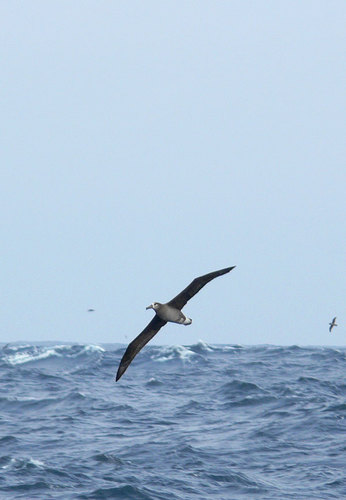

gt-class_label:		0-Black_footed_Albatros
pred-class_label, top1:	2-Sooty_Albatros
pred-class_label, top5:	['2-Sooty_Albatros', '99-Brown_Pelica', '0-Black_footed_Albatros', '22-Brandt_Cormoran', '70-Long_tailed_Jaege']
------
gt-attribute_label: [1, 17, 22, 50, 51, 79, 83, 86, 89]
	1-has_bill_shape::hooked_seabird
	17-has_underparts_color::grey
	22-has_breast_pattern::solid
	50-has_eye_color::black
	51-has_bill_length::about_the_same_as_head
	79-has_size::medium_(9_-_16_in)
	83-has_back_pattern::solid
	86-has_tail_pattern::solid
	89-has_belly_pattern::solid
pred-attribute_label [1, 22, 47, 50, 51, 57, 61, 79, 83, 86, 89, 96, 100, 106, 108]
	1-has_bill_shape::hooked_seabird
	22-has_breast_pattern::solid
	47-has_throat_color::black
	50-has_eye_color::black
	51-has_bill_length::about_the_same_as_head
	57-has_forehead_color::black
	61-has_under_tail_color::black
	79-has_size::medium_(9_-_16_in)
	83-has_back_pattern::solid
	86-has_tail_pattern::solid
	89-has_belly_pattern::solid
	96-has_leg

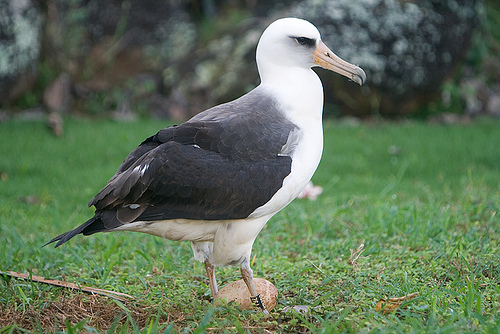

gt-class_label:		1-Laysan_Albatros
pred-class_label, top1:	1-Laysan_Albatros
pred-class_label, top5:	['1-Laysan_Albatros', '65-Western_Gul', '105-Horned_Puffi', '64-Slaty_backed_Gul', '44-Northern_Fulma']
------
gt-attribute_label: [1, 13, 20, 22, 25, 43, 48, 50, 51, 58, 61, 68, 74, 79, 83, 89, 93, 94, 101, 107, 108]
	1-has_bill_shape::hooked_seabird
	13-has_upperparts_color::black
	20-has_underparts_color::white
	22-has_breast_pattern::solid
	25-has_back_color::brown
	43-has_breast_color::white
	48-has_throat_color::white
	50-has_eye_color::black
	51-has_bill_length::about_the_same_as_head
	58-has_forehead_color::white
	61-has_under_tail_color::black
	68-has_nape_color::white
	74-has_belly_color::white
	79-has_size::medium_(9_-_16_in)
	83-has_back_pattern::solid
	89-has_belly_pattern::solid
	93-has_primary_color::black
	94-has_primary_color::white
	101-has_bill_color::buff
	107-has_crown_color::white
	108-has_wing_pattern::solid
pred-attribute_label [1, 13, 20, 22, 25, 43, 48, 50, 51,

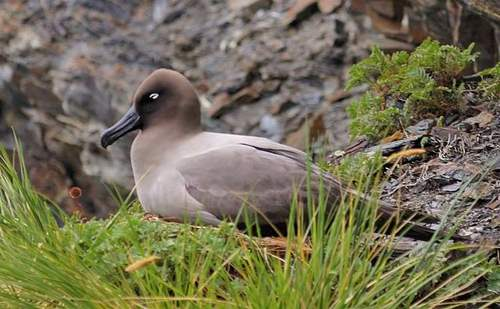

gt-class_label:		2-Sooty_Albatros
pred-class_label, top1:	2-Sooty_Albatros
pred-class_label, top5:	['2-Sooty_Albatros', '70-Long_tailed_Jaege', '0-Black_footed_Albatros', '44-Northern_Fulma', '71-Pomarine_Jaege']
------
gt-attribute_label: [1, 5, 11, 22, 33, 47, 50, 51, 57, 60, 61, 79, 83, 86, 89, 96, 100, 106, 108]
	1-has_bill_shape::hooked_seabird
	5-has_wing_color::grey
	11-has_upperparts_color::grey
	22-has_breast_pattern::solid
	33-has_upper_tail_color::grey
	47-has_throat_color::black
	50-has_eye_color::black
	51-has_bill_length::about_the_same_as_head
	57-has_forehead_color::black
	60-has_under_tail_color::grey
	61-has_under_tail_color::black
	79-has_size::medium_(9_-_16_in)
	83-has_back_pattern::solid
	86-has_tail_pattern::solid
	89-has_belly_pattern::solid
	96-has_leg_color::grey
	100-has_bill_color::black
	106-has_crown_color::black
	108-has_wing_pattern::solid
pred-attribute_label [1, 5, 11, 22, 33, 47, 50, 51, 57, 60, 61, 79, 83, 86, 89, 96, 100, 106, 108]
	1-has_bill_shape

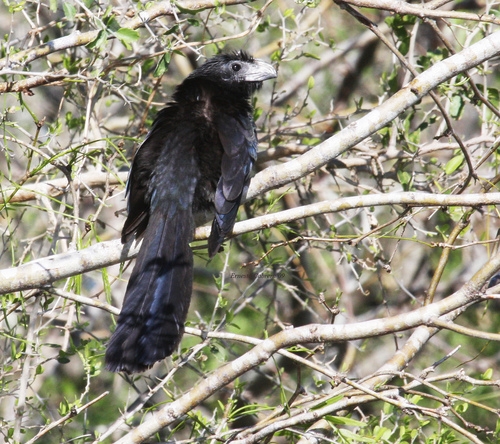

gt-class_label:		3-Groove_billed_An
pred-class_label, top1:	3-Groove_billed_An
pred-class_label, top5:	['3-Groove_billed_An', '29-Fish_Cro', '25-Bronzed_Cowbir', '26-Shiny_Cowbir', '28-American_Cro']
------
gt-attribute_label: [7, 13, 19, 22, 28, 34, 38, 42, 47, 50, 52, 57, 61, 67, 73, 78, 83, 86, 89, 93, 97, 100, 106, 108]
	7-has_wing_color::black
	13-has_upperparts_color::black
	19-has_underparts_color::black
	22-has_breast_pattern::solid
	28-has_back_color::black
	34-has_upper_tail_color::black
	38-has_head_pattern::plain
	42-has_breast_color::black
	47-has_throat_color::black
	50-has_eye_color::black
	52-has_bill_length::shorter_than_head
	57-has_forehead_color::black
	61-has_under_tail_color::black
	67-has_nape_color::black
	73-has_belly_color::black
	78-has_size::small_(5_-_9_in)
	83-has_back_pattern::solid
	86-has_tail_pattern::solid
	89-has_belly_pattern::solid
	93-has_primary_color::black
	97-has_leg_color::black
	100-has_bill_color::black
	106-has_crown_color::black
	108-has_

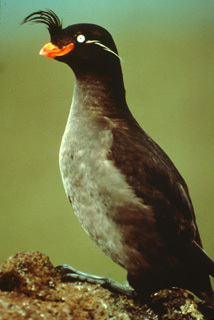

gt-class_label:		4-Crested_Aukle
pred-class_label, top1:	4-Crested_Aukle
pred-class_label, top5:	['4-Crested_Aukle', '6-Parakeet_Aukle', '23-Red_faced_Cormoran', '8-Brewer_Blackbir', '18-Gray_Catbir']
------
gt-attribute_label: [7, 13, 17, 22, 28, 34, 40, 42, 47, 52, 57, 61, 67, 71, 73, 77, 79, 83, 86, 89, 93, 96, 106, 108]
	7-has_wing_color::black
	13-has_upperparts_color::black
	17-has_underparts_color::grey
	22-has_breast_pattern::solid
	28-has_back_color::black
	34-has_upper_tail_color::black
	40-has_breast_color::grey
	42-has_breast_color::black
	47-has_throat_color::black
	52-has_bill_length::shorter_than_head
	57-has_forehead_color::black
	61-has_under_tail_color::black
	67-has_nape_color::black
	71-has_belly_color::grey
	73-has_belly_color::black
	77-has_wing_shape::pointed-wings
	79-has_size::medium_(9_-_16_in)
	83-has_back_pattern::solid
	86-has_tail_pattern::solid
	89-has_belly_pattern::solid
	93-has_primary_color::black
	96-has_leg_color::grey
	106-has_crown_color::black
	1

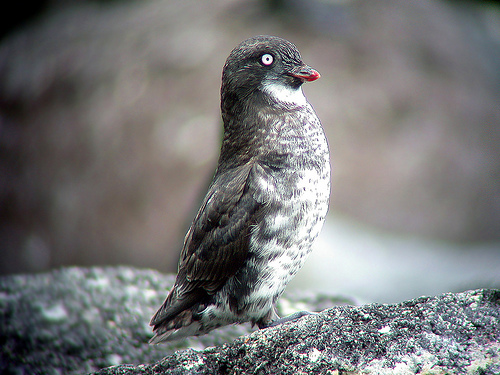

gt-class_label:		5-Least_Aukle
pred-class_label, top1:	5-Least_Aukle
pred-class_label, top5:	['5-Least_Aukle', '4-Crested_Aukle', '6-Parakeet_Aukle', '66-Anna_Hummingbir', '121-Harris_Sparro']
------
gt-attribute_label: [3, 7, 8, 11, 13, 17, 19, 20, 23, 28, 34, 40, 42, 43, 48, 52, 57, 61, 62, 67, 71, 74, 93, 96, 100, 106, 110]
	3-has_bill_shape::cone
	7-has_wing_color::black
	8-has_wing_color::white
	11-has_upperparts_color::grey
	13-has_upperparts_color::black
	17-has_underparts_color::grey
	19-has_underparts_color::black
	20-has_underparts_color::white
	23-has_breast_pattern::striped
	28-has_back_color::black
	34-has_upper_tail_color::black
	40-has_breast_color::grey
	42-has_breast_color::black
	43-has_breast_color::white
	48-has_throat_color::white
	52-has_bill_length::shorter_than_head
	57-has_forehead_color::black
	61-has_under_tail_color::black
	62-has_under_tail_color::white
	67-has_nape_color::black
	71-has_belly_color::grey
	74-has_belly_color::white
	93-has_primary_color::bla

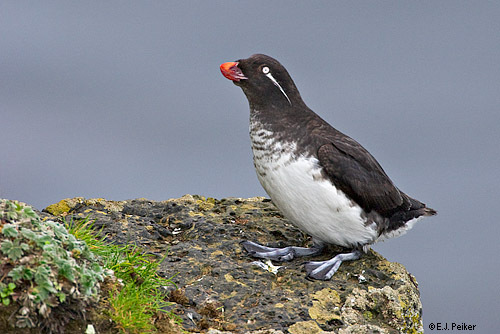

gt-class_label:		6-Parakeet_Aukle
pred-class_label, top1:	6-Parakeet_Aukle
pred-class_label, top5:	['6-Parakeet_Aukle', '105-Horned_Puffi', '88-Hooded_Merganse', '4-Crested_Aukle', '23-Red_faced_Cormoran']
------
gt-attribute_label: [7, 13, 20, 28, 34, 43, 47, 48, 52, 57, 61, 67, 74, 79, 83, 86, 89, 93, 94, 96, 106, 108]
	7-has_wing_color::black
	13-has_upperparts_color::black
	20-has_underparts_color::white
	28-has_back_color::black
	34-has_upper_tail_color::black
	43-has_breast_color::white
	47-has_throat_color::black
	48-has_throat_color::white
	52-has_bill_length::shorter_than_head
	57-has_forehead_color::black
	61-has_under_tail_color::black
	67-has_nape_color::black
	74-has_belly_color::white
	79-has_size::medium_(9_-_16_in)
	83-has_back_pattern::solid
	86-has_tail_pattern::solid
	89-has_belly_pattern::solid
	93-has_primary_color::black
	94-has_primary_color::white
	96-has_leg_color::grey
	106-has_crown_color::black
	108-has_wing_pattern::solid
pred-attribute_label [7, 13, 20, 28

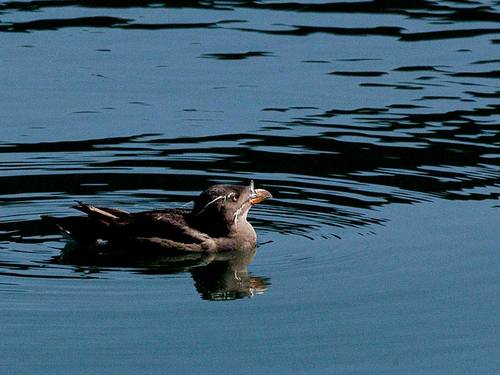

gt-class_label:		7-Rhinoceros_Aukle
pred-class_label, top1:	7-Rhinoceros_Aukle
pred-class_label, top5:	['7-Rhinoceros_Aukle', '57-Pigeon_Guillemo', '105-Horned_Puffi', '4-Crested_Aukle', '24-Pelagic_Cormoran']
------
gt-attribute_label: [7, 13, 17, 22, 28, 34, 40, 42, 45, 47, 50, 52, 57, 61, 67, 79, 81, 83, 86, 89, 93, 98, 106, 108]
	7-has_wing_color::black
	13-has_upperparts_color::black
	17-has_underparts_color::grey
	22-has_breast_pattern::solid
	28-has_back_color::black
	34-has_upper_tail_color::black
	40-has_breast_color::grey
	42-has_breast_color::black
	45-has_throat_color::grey
	47-has_throat_color::black
	50-has_eye_color::black
	52-has_bill_length::shorter_than_head
	57-has_forehead_color::black
	61-has_under_tail_color::black
	67-has_nape_color::black
	79-has_size::medium_(9_-_16_in)
	81-has_shape::duck-like
	83-has_back_pattern::solid
	86-has_tail_pattern::solid
	89-has_belly_pattern::solid
	93-has_primary_color::black
	98-has_leg_color::buff
	106-has_crown_color::black
	10

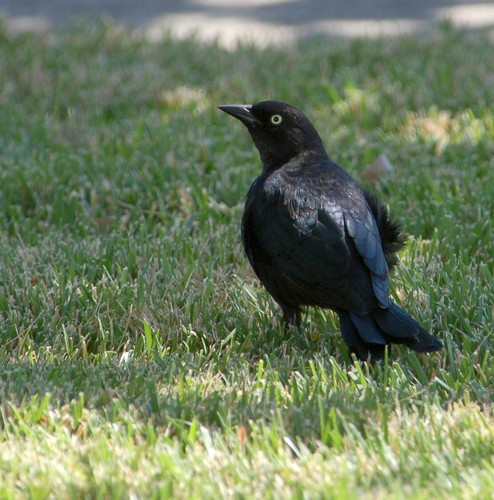

gt-class_label:		8-Brewer_Blackbir
pred-class_label, top1:	8-Brewer_Blackbir
pred-class_label, top5:	['8-Brewer_Blackbir', '28-American_Cro', '26-Shiny_Cowbir', '106-Common_Rave', '9-Red_winged_Blackbir']
------
gt-attribute_label: [2, 7, 13, 19, 22, 28, 34, 42, 47, 50, 52, 57, 61, 67, 73, 76, 78, 83, 86, 89, 93, 97, 100, 106, 108]
	2-has_bill_shape::all-purpose
	7-has_wing_color::black
	13-has_upperparts_color::black
	19-has_underparts_color::black
	22-has_breast_pattern::solid
	28-has_back_color::black
	34-has_upper_tail_color::black
	42-has_breast_color::black
	47-has_throat_color::black
	50-has_eye_color::black
	52-has_bill_length::shorter_than_head
	57-has_forehead_color::black
	61-has_under_tail_color::black
	67-has_nape_color::black
	73-has_belly_color::black
	76-has_wing_shape::rounded-wings
	78-has_size::small_(5_-_9_in)
	83-has_back_pattern::solid
	86-has_tail_pattern::solid
	89-has_belly_pattern::solid
	93-has_primary_color::black
	97-has_leg_color::black
	100-has_bill_color

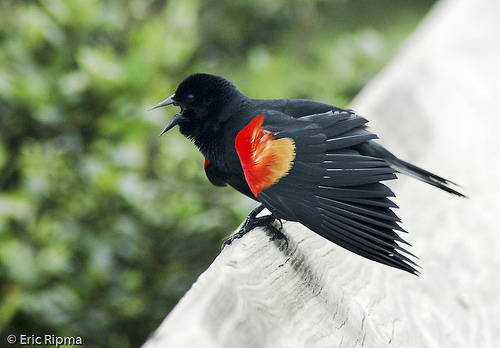

gt-class_label:		9-Red_winged_Blackbir
pred-class_label, top1:	9-Red_winged_Blackbir
pred-class_label, top5:	['9-Red_winged_Blackbir', '108-American_Redstar', '135-Barn_Swallo', '25-Bronzed_Cowbir', '48-Boat_tailed_Grackl']
------
gt-attribute_label: [7, 13, 19, 22, 28, 34, 38, 42, 47, 50, 52, 57, 61, 67, 73, 76, 78, 82, 83, 86, 89, 93, 97, 100, 106, 111]
	7-has_wing_color::black
	13-has_upperparts_color::black
	19-has_underparts_color::black
	22-has_breast_pattern::solid
	28-has_back_color::black
	34-has_upper_tail_color::black
	38-has_head_pattern::plain
	42-has_breast_color::black
	47-has_throat_color::black
	50-has_eye_color::black
	52-has_bill_length::shorter_than_head
	57-has_forehead_color::black
	61-has_under_tail_color::black
	67-has_nape_color::black
	73-has_belly_color::black
	76-has_wing_shape::rounded-wings
	78-has_size::small_(5_-_9_in)
	82-has_shape::perching-like
	83-has_back_pattern::solid
	86-has_tail_pattern::solid
	89-has_belly_pattern::solid
	93-has_primary_color::

In [20]:

repo_dir = 'D:\\ninavv\\phd\\study\\responsible AI\\CBM\\ConceptBottleneck\\'

for i in indexes:
    #gt
    id_ = test_image[i]['id']
    img_path = test_image[i]['img_path']
    class_label = test_image[i]['class_label']
    attribute_label = test_image[i]['attribute_label']
    attribute_certainty = test_image[i]['attribute_certainty']
    
    img_path = repo_dir+img_path.split('CUB_supervision/datasets/')[-1]
    print('------')
    display(Image(filename=img_path))
    
    print('gt-class_label:\t\t{}-{}'.format(class_label,classes[class_label]))
    pred_label = np.argmax(pred_class_logits[i])
    print('pred-class_label, top1:\t{}-{}'.format(pred_label,classes[pred_label]))
    topk_pred_labels = list(pred_topk_class_outputs[i])
    topk_pred_txt = [classes[each] for each in topk_pred_labels]
    print('pred-class_label, top5:\t{}'.format(['{}-{}'.format(topk_pred_labels[q],topk_pred_txt[q]) for q in range(5)]))
    
    print('------')
    gt_attr = list([each for each in range(112) if attribute_label[each] ==1])
    print('gt-attribute_label:',gt_attr)
    for j in range(len(attribute_label)):
        if attribute_label[j] == 1:
            print('\t{}-{}'.format(j,attributes[j]))
            
    threshold = 0.5
    pred_attr_thre = list(np.where(pred_attr_outputs_sigmoid[i]>threshold)[0])
    print('pred-attribute_label',pred_attr_thre)
    for each in pred_attr_thre:
        print('\t{}-{}'.format(each,attributes[each]))
        
    print('------')
    print('Euclidean distance between concept attributes: {:.2f}'.format(np.linalg.norm(attribute_label-pred_attr_outputs_sigmoid[i])))
    

### 5. wrong ids

In [64]:
wrong_ids = list(np.load(output_dir+'wrong_idx_model0.npy'))

# 2023
random.seed(2023)
sample_wrong_ids = random.sample(wrong_ids,num,)

In [65]:
sample_wrong_ids

[3435, 3859, 3454, 2955, 5226, 4895, 3110, 5665, 898, 1082]

------


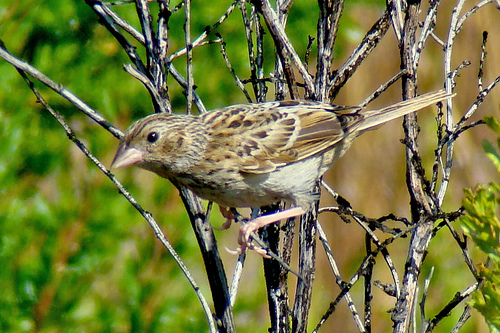

gt-class_label:		120-Grasshopper_Sparro
pred-class_label, top1:	124-Lincoln_Sparro
pred-class_label, top5:	['124-Lincoln_Sparro', '117-House_Sparro', '114-Brewer_Sparro', '195-House_Wre', '196-Marsh_Wre']
------
gt-attribute_label: [3, 4, 9, 10, 13, 15, 21, 25, 30, 31, 36, 43, 44, 49, 50, 52, 63, 69, 75, 76, 80, 82, 84, 89, 90, 95, 98, 99, 101, 110]
	3-has_bill_shape::cone
	4-has_wing_color::brown
	9-has_wing_color::buff
	10-has_upperparts_color::brown
	13-has_upperparts_color::black
	15-has_upperparts_color::buff
	21-has_underparts_color::buff
	25-has_back_color::brown
	30-has_back_color::buff
	31-has_tail_shape::notched_tail
	36-has_upper_tail_color::buff
	43-has_breast_color::white
	44-has_breast_color::buff
	49-has_throat_color::buff
	50-has_eye_color::black
	52-has_bill_length::shorter_than_head
	63-has_under_tail_color::buff
	69-has_nape_color::buff
	75-has_belly_color::buff
	76-has_wing_shape::rounded-wings
	80-has_size::very_small_(3_-_5_in)
	82-has_shape::perching-like
	84-has

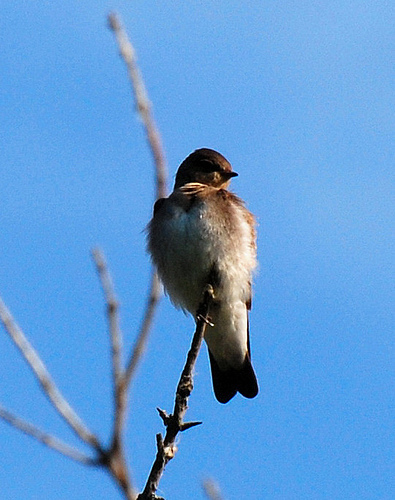

gt-class_label:		134-Bank_Swallo
pred-class_label, top1:	115-Chipping_Sparro
pred-class_label, top5:	['115-Chipping_Sparro', '114-Brewer_Sparro', '117-House_Sparro', '129-Tree_Sparro', '101-Western_Wood_Pewe']
------
gt-attribute_label: [3, 4, 7, 10, 20, 22, 25, 32, 43, 48, 50, 52, 54, 59, 74, 78, 89, 90, 93, 100]
	3-has_bill_shape::cone
	4-has_wing_color::brown
	7-has_wing_color::black
	10-has_upperparts_color::brown
	20-has_underparts_color::white
	22-has_breast_pattern::solid
	25-has_back_color::brown
	32-has_upper_tail_color::brown
	43-has_breast_color::white
	48-has_throat_color::white
	50-has_eye_color::black
	52-has_bill_length::shorter_than_head
	54-has_forehead_color::brown
	59-has_under_tail_color::brown
	74-has_belly_color::white
	78-has_size::small_(5_-_9_in)
	89-has_belly_pattern::solid
	90-has_primary_color::brown
	93-has_primary_color::black
	100-has_bill_color::black
pred-attribute_label [3, 4, 10, 20, 22, 25, 31, 32, 43, 48, 50, 52, 54, 65, 74, 76, 78, 82, 84, 89, 90, 

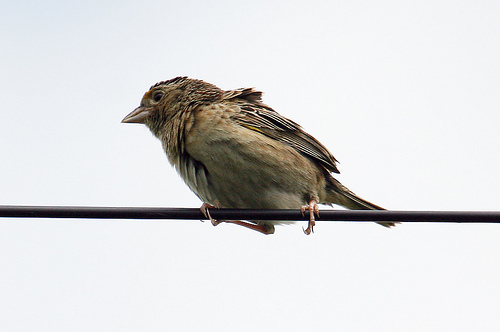

gt-class_label:		120-Grasshopper_Sparro
pred-class_label, top1:	117-House_Sparro
pred-class_label, top5:	['117-House_Sparro', '114-Brewer_Sparro', '131-White_crowned_Sparro', '34-Purple_Finc', '55-Pine_Grosbea']
------
gt-attribute_label: [3, 4, 9, 10, 13, 15, 21, 25, 30, 31, 36, 43, 44, 49, 50, 52, 63, 69, 75, 76, 80, 82, 84, 89, 90, 95, 98, 99, 101, 110]
	3-has_bill_shape::cone
	4-has_wing_color::brown
	9-has_wing_color::buff
	10-has_upperparts_color::brown
	13-has_upperparts_color::black
	15-has_upperparts_color::buff
	21-has_underparts_color::buff
	25-has_back_color::brown
	30-has_back_color::buff
	31-has_tail_shape::notched_tail
	36-has_upper_tail_color::buff
	43-has_breast_color::white
	44-has_breast_color::buff
	49-has_throat_color::buff
	50-has_eye_color::black
	52-has_bill_length::shorter_than_head
	63-has_under_tail_color::buff
	69-has_nape_color::buff
	75-has_belly_color::buff
	76-has_wing_shape::rounded-wings
	80-has_size::very_small_(3_-_5_in)
	82-has_shape::perching-like


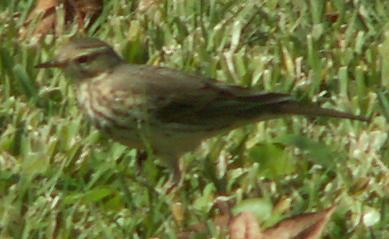

gt-class_label:		103-American_Pipi
pred-class_label, top1:	98-Ovenbir
pred-class_label, top5:	['98-Ovenbir', '173-Palm_Warble', '182-Northern_Waterthrus', '177-Swainson_Warble', '148-Brown_Thrashe']
------
gt-attribute_label: [2, 4, 9, 10, 15, 21, 23, 25, 30, 31, 32, 36, 39, 44, 49, 50, 52, 54, 59, 63, 69, 75, 76, 78, 82, 90, 95, 110]
	2-has_bill_shape::all-purpose
	4-has_wing_color::brown
	9-has_wing_color::buff
	10-has_upperparts_color::brown
	15-has_upperparts_color::buff
	21-has_underparts_color::buff
	23-has_breast_pattern::striped
	25-has_back_color::brown
	30-has_back_color::buff
	31-has_tail_shape::notched_tail
	32-has_upper_tail_color::brown
	36-has_upper_tail_color::buff
	39-has_breast_color::brown
	44-has_breast_color::buff
	49-has_throat_color::buff
	50-has_eye_color::black
	52-has_bill_length::shorter_than_head
	54-has_forehead_color::brown
	59-has_under_tail_color::brown
	63-has_under_tail_color::buff
	69-has_nape_color::buff
	75-has_belly_color::buff
	76-has_wing_shape::

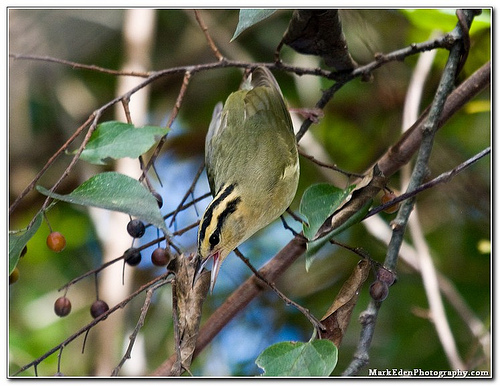

gt-class_label:		180-Worm_eating_Warble
pred-class_label, top1:	36-Acadian_Flycatche
pred-class_label, top5:	['36-Acadian_Flycatche', '42-Yellow_bellied_Flycatche', '152-Philadelphia_Vire', '177-Swainson_Warble', '175-Prairie_Warble']
------
gt-attribute_label: [2, 18, 22, 31, 33, 41, 46, 50, 52, 56, 57, 60, 66, 72, 77, 78, 82, 83, 86, 89, 92, 98, 101, 105, 106, 108]
	2-has_bill_shape::all-purpose
	18-has_underparts_color::yellow
	22-has_breast_pattern::solid
	31-has_tail_shape::notched_tail
	33-has_upper_tail_color::grey
	41-has_breast_color::yellow
	46-has_throat_color::yellow
	50-has_eye_color::black
	52-has_bill_length::shorter_than_head
	56-has_forehead_color::yellow
	57-has_forehead_color::black
	60-has_under_tail_color::grey
	66-has_nape_color::yellow
	72-has_belly_color::yellow
	77-has_wing_shape::pointed-wings
	78-has_size::small_(5_-_9_in)
	82-has_shape::perching-like
	83-has_back_pattern::solid
	86-has_tail_pattern::solid
	89-has_belly_pattern::solid
	92-has_primary_color::y

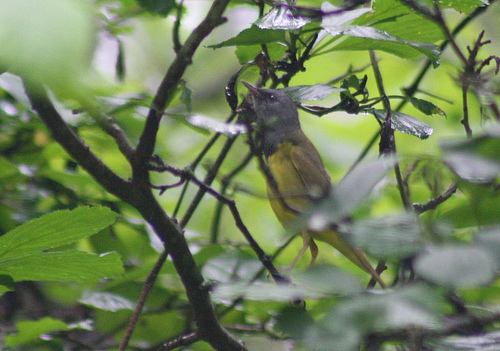

gt-class_label:		169-Mourning_Warble
pred-class_label, top1:	171-Nashville_Warble
pred-class_label, top5:	['171-Nashville_Warble', '178-Tennessee_Warble', '151-Blue_headed_Vire', '155-White_eyed_Vire', '153-Red_eyed_Vire']
------
gt-attribute_label: [2, 18, 41, 50, 52, 55, 65, 72, 78, 82, 83, 86, 89, 92, 98, 99, 104]
	2-has_bill_shape::all-purpose
	18-has_underparts_color::yellow
	41-has_breast_color::yellow
	50-has_eye_color::black
	52-has_bill_length::shorter_than_head
	55-has_forehead_color::grey
	65-has_nape_color::grey
	72-has_belly_color::yellow
	78-has_size::small_(5_-_9_in)
	82-has_shape::perching-like
	83-has_back_pattern::solid
	86-has_tail_pattern::solid
	89-has_belly_pattern::solid
	92-has_primary_color::yellow
	98-has_leg_color::buff
	99-has_bill_color::grey
	104-has_crown_color::grey
pred-attribute_label [2, 11, 12, 18, 20, 22, 26, 31, 41, 50, 52, 55, 65, 72, 76, 78, 82, 89, 92, 96, 99, 104]
	2-has_bill_shape::all-purpose
	11-has_upperparts_color::grey
	12-has_upperparts_

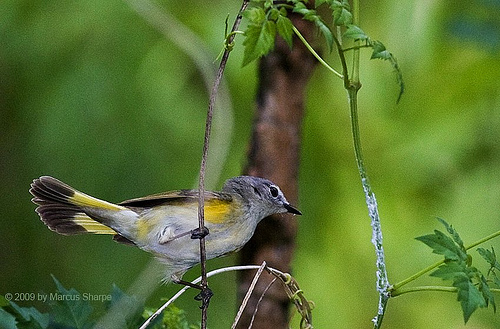

gt-class_label:		108-American_Redstar
pred-class_label, top1:	151-Blue_headed_Vire
pred-class_label, top5:	['151-Blue_headed_Vire', '38-Least_Flycatche', '159-Black_throated_Blue_Warble', '155-White_eyed_Vire', '164-Chestnut_sided_Warble']
------
gt-attribute_label: [2, 7, 13, 19, 24, 28, 31, 34, 38, 42, 47, 50, 52, 57, 61, 67, 74, 76, 78, 82, 83, 88, 93, 97, 100, 106, 111]
	2-has_bill_shape::all-purpose
	7-has_wing_color::black
	13-has_upperparts_color::black
	19-has_underparts_color::black
	24-has_breast_pattern::multi-colored
	28-has_back_color::black
	31-has_tail_shape::notched_tail
	34-has_upper_tail_color::black
	38-has_head_pattern::plain
	42-has_breast_color::black
	47-has_throat_color::black
	50-has_eye_color::black
	52-has_bill_length::shorter_than_head
	57-has_forehead_color::black
	61-has_under_tail_color::black
	67-has_nape_color::black
	74-has_belly_color::white
	76-has_wing_shape::rounded-wings
	78-has_size::small_(5_-_9_in)
	82-has_shape::perching-like
	83-has_back_patt

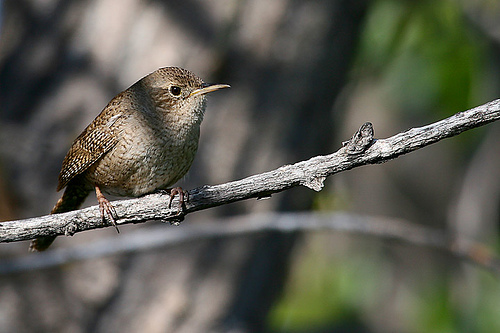

gt-class_label:		195-House_Wre
pred-class_label, top1:	198-Winter_Wre
pred-class_label, top5:	['198-Winter_Wre', '197-Rock_Wre', '192-Bewick_Wre', '196-Marsh_Wre', '51-Pied_billed_Greb']
------
gt-attribute_label: [2, 4, 9, 10, 15, 21, 22, 25, 30, 32, 36, 44, 49, 50, 51, 54, 59, 63, 64, 69, 75, 82, 83, 87, 89, 90, 98, 99, 103, 110]
	2-has_bill_shape::all-purpose
	4-has_wing_color::brown
	9-has_wing_color::buff
	10-has_upperparts_color::brown
	15-has_upperparts_color::buff
	21-has_underparts_color::buff
	22-has_breast_pattern::solid
	25-has_back_color::brown
	30-has_back_color::buff
	32-has_upper_tail_color::brown
	36-has_upper_tail_color::buff
	44-has_breast_color::buff
	49-has_throat_color::buff
	50-has_eye_color::black
	51-has_bill_length::about_the_same_as_head
	54-has_forehead_color::brown
	59-has_under_tail_color::brown
	63-has_under_tail_color::buff
	64-has_nape_color::brown
	69-has_nape_color::buff
	75-has_belly_color::buff
	82-has_shape::perching-like
	83-has_back_pattern::soli

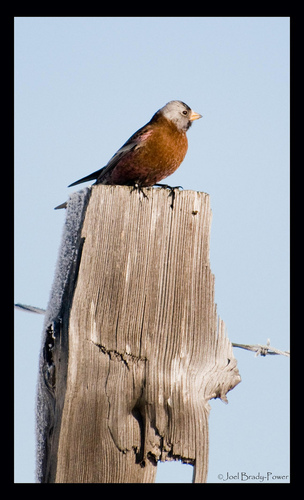

gt-class_label:		33-Gray_crowned_Rosy_Finc
pred-class_label, top1:	135-Barn_Swallo
pred-class_label, top5:	['135-Barn_Swallo', '96-Orchard_Oriol', '79-Green_Kingfishe', '138-Scarlet_Tanage', '10-Rusty_Blackbir']
------
gt-attribute_label: [3, 9, 10, 11, 13, 16, 21, 25, 30, 31, 33, 39, 44, 50, 52, 55, 57, 60, 64, 70, 75, 76, 78, 82, 84, 87, 90, 91, 93, 97, 101, 104, 110]
	3-has_bill_shape::cone
	9-has_wing_color::buff
	10-has_upperparts_color::brown
	11-has_upperparts_color::grey
	13-has_upperparts_color::black
	16-has_underparts_color::brown
	21-has_underparts_color::buff
	25-has_back_color::brown
	30-has_back_color::buff
	31-has_tail_shape::notched_tail
	33-has_upper_tail_color::grey
	39-has_breast_color::brown
	44-has_breast_color::buff
	50-has_eye_color::black
	52-has_bill_length::shorter_than_head
	55-has_forehead_color::grey
	57-has_forehead_color::black
	60-has_under_tail_color::grey
	64-has_nape_color::brown
	70-has_belly_color::brown
	75-has_belly_color::buff
	76-has_wing_shape

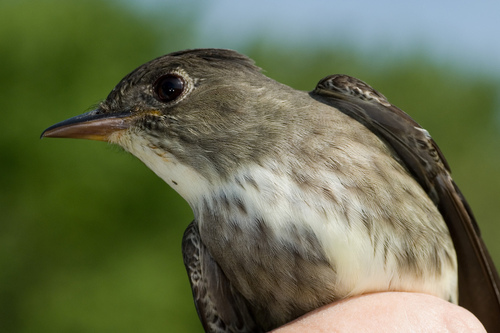

gt-class_label:		39-Olive_sided_Flycatche
pred-class_label, top1:	38-Least_Flycatche
pred-class_label, top5:	['38-Least_Flycatche', '102-Sayorni', '170-Myrtle_Warble', '41-Vermilion_Flycatche', '173-Palm_Warble']
------
gt-attribute_label: [2, 5, 11, 17, 26, 31, 33, 38, 40, 50, 52, 55, 60, 71, 78, 82, 86, 91, 97, 100, 104, 111]
	2-has_bill_shape::all-purpose
	5-has_wing_color::grey
	11-has_upperparts_color::grey
	17-has_underparts_color::grey
	26-has_back_color::grey
	31-has_tail_shape::notched_tail
	33-has_upper_tail_color::grey
	38-has_head_pattern::plain
	40-has_breast_color::grey
	50-has_eye_color::black
	52-has_bill_length::shorter_than_head
	55-has_forehead_color::grey
	60-has_under_tail_color::grey
	71-has_belly_color::grey
	78-has_size::small_(5_-_9_in)
	82-has_shape::perching-like
	86-has_tail_pattern::solid
	91-has_primary_color::grey
	97-has_leg_color::black
	100-has_bill_color::black
	104-has_crown_color::grey
	111-has_wing_pattern::multi-colored
pred-attribute_label [2, 20

In [66]:

repo_dir = 'D:\\ninavv\\phd\\study\\responsible AI\\CBM\\ConceptBottleneck\\'

for i in sample_wrong_ids:
    #gt
    id_ = test_image[i]['id']
    img_path = test_image[i]['img_path']
    class_label = test_image[i]['class_label']
    attribute_label = test_image[i]['attribute_label']
    attribute_certainty = test_image[i]['attribute_certainty']
    
    img_path = repo_dir+img_path.split('CUB_supervision/datasets/')[-1]
    print('------')
    display(Image(filename=img_path))
    
    print('gt-class_label:\t\t{}-{}'.format(class_label,classes[class_label]))
    pred_label = np.argmax(pred_class_logits[i])
    print('pred-class_label, top1:\t{}-{}'.format(pred_label,classes[pred_label]))
    topk_pred_labels = list(pred_topk_class_outputs[i])
    topk_pred_txt = [classes[each] for each in topk_pred_labels]
    print('pred-class_label, top5:\t{}'.format(['{}-{}'.format(topk_pred_labels[q],topk_pred_txt[q]) for q in range(5)]))
    
    print('------')
    gt_attr = list([each for each in range(112) if attribute_label[each] ==1])
    print('gt-attribute_label:',gt_attr)
    for j in range(len(attribute_label)):
        if attribute_label[j] == 1:
            print('\t{}-{}'.format(j,attributes[j]))
            
    threshold = 0.5
    pred_attr_thre = list(np.where(pred_attr_outputs_sigmoid[i]>threshold)[0])
    print('pred-attribute_label',pred_attr_thre)
    for each in pred_attr_thre:
        print('\t{}-{}'.format(each,attributes[each]))
        
    print('------')
    print('Euclidean distance between concept attributes: {:.2f}'.format(np.linalg.norm(attribute_label-pred_attr_outputs_sigmoid[i])))
    